## IMPORTS

In [1]:
#importing the libraries
import pandas as pd
import numpy as np

## READING THE DATASET

In [2]:

df=pd.read_csv('dataset.csv')
df.head()

,Freq,BrainCondition
0,0,1
1,1,1
2,2,1
3,3,1
4,4,2


## DATA VISUALIZATION

In [4]:
#Splitting the dataset into dependent and independent variables
X = df.iloc[:,0:1]
y = df['BrainCondition']



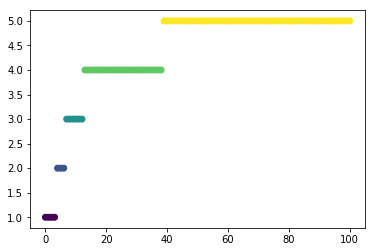

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.scatter(X,y,c=y)

E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


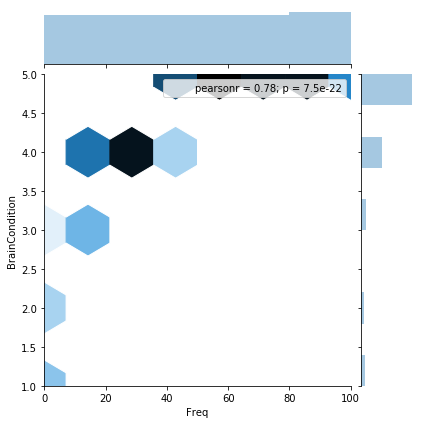

In [6]:
sns.jointplot(x='Freq',y='BrainCondition',data=df,kind='hex')

E:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
E:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
E:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
E:\anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


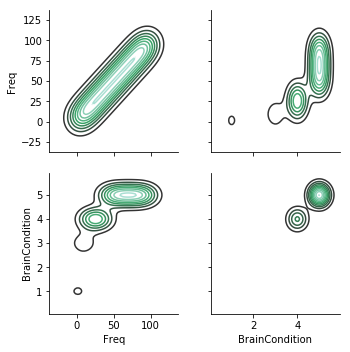

In [7]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(df)
g.map(sns.kdeplot)


In [8]:
df.corr()

,Freq,BrainCondition
Freq,1.000000,0.779732
BrainCondition,0.779732,1.000000


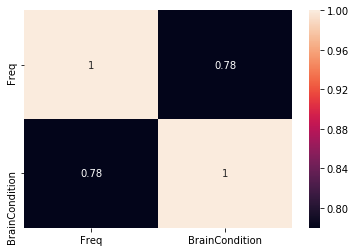

In [9]:
sns.heatmap(df.corr(),annot=True)

## Splitting the dataset into training and test sets

In [11]:

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state = 0) 

## Training the model using decison tree classifier

In [12]:

from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth =4).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

In [13]:
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 

In [14]:

dtree_predictions

array([4, 5, 1, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 3, 2, 4, 4, 4, 4, 3, 5, 5,
       2, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5], dtype=int64)

In [15]:
y_test

26     4
86     5
2      1
55     5
75     5
94     5
16     4
73     5
54     5
96     5
53     5
93     5
78     5
13     4
7      3
30     4
22     4
24     4
33     4
8      3
43     5
62     5
3      1
71     5
45     5
48     5
6      2
100    5
82     5
76     5
60     5
80     5
91     5
68     5
Name: BrainCondition, dtype: int64

In [9]:
cm

array([[ 1,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0],
       [ 0,  1,  1,  0,  0],
       [ 0,  0,  1,  6,  0],
       [ 0,  0,  0,  0, 22]], dtype=int64)

## Evaluating the model

In [16]:
#Creating a classification report to test the precision
from sklearn.metrics import classification_report
print(classification_report(y_test,dtree_predictions))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.33      1.00      0.50         1
           3       0.50      0.50      0.50         2
           4       1.00      0.86      0.92         7
           5       1.00      1.00      1.00        22

    accuracy                           0.91        34
   macro avg       0.77      0.77      0.72        34
weighted avg       0.95      0.91      0.92        34



## CONCLUSION

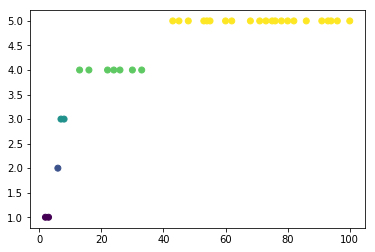

In [17]:
plt.scatter(X_test,y_test,c=y_test)

### It can be seen that the five categories correspond to different frequency ranges as shown in the plot